In [1]:
import regression
import pandas as pd
import importlib
import numpy as np
import matplotlib.pyplot as plt

In [143]:
importlib.reload(regression)

<module 'regression' from '/home/dawid/Desktop/Python Projects/MachineLearning/LinearRegression/regression.py'>

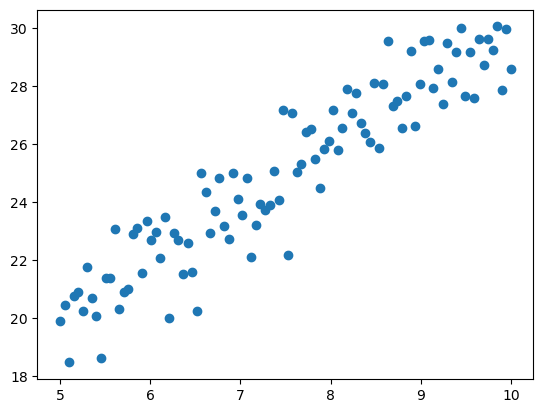

In [2]:
X_lin = np.linspace(start=5, stop=10, num=100)
X_lin = np.reshape(X_lin, (X_lin.shape[0], 1))
y_lin = 2 * X_lin.flatten() + 10

y_lin_noise = y_lin + np.random.normal(size=100)

plt.scatter(X_lin, y_lin_noise)

In [3]:
X1_lin = np.ones((X_lin.shape[0], 1))
X_lin_one = np.hstack((X_lin, X1_lin))

In [144]:
importlib.reload(regression)
sgd = regression.StochasticGradientDescent(0.001)

sgd.fit(X_lin_one, y_lin_noise)

print(f'Coefficients: {sgd.info()}')

Coefficients: [[ 1.88468751]
 [10.79504074]]


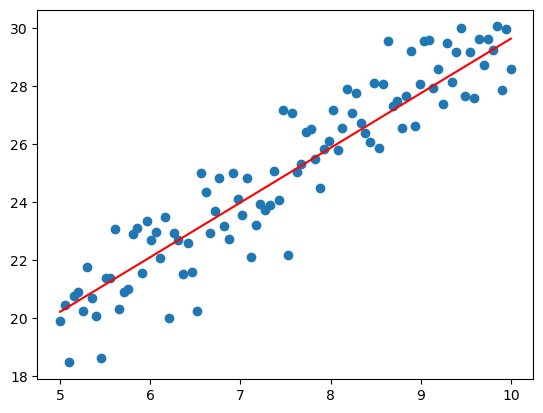

In [145]:
y_lin_pred = sgd.pred(X_lin_one)
plt.plot(X_lin, y_lin_pred, color='red')
plt.scatter(X_lin, y_lin_noise)

plt.show()

In [146]:
importlib.reload(regression)
bgd = regression.BatchGradientDescent(1e-4)

bgd.fit(X_lin_one, y_lin_noise)

print(f'Coefficients: {bgd.info()}')

Coefficients: [[ 1.99161318]
 [10.06128156]]


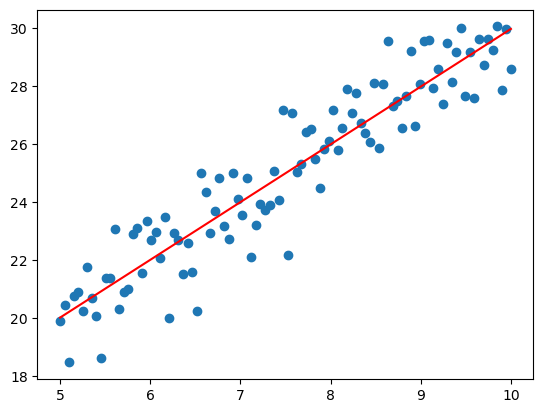

In [49]:
y_lin_pred_2 = bgd.pred(X_lin_one)
plt.plot(X_lin, y_lin_pred_2, color='red')
plt.scatter(X_lin, y_lin_noise)

plt.show()

In [51]:
print(f'RMSE for batch gradient descent: {np.sqrt(np.mean((y_lin_pred_2 - y_lin_noise)**2))}')
print(f'RMSE for stochastic gradient descent: {np.sqrt(np.mean((y_lin_pred - y_lin_noise)**2))}')

RMSE for batch gradient descent: 4.2444310545122885
RMSE for stochastic gradient descent: 4.139932576637859


### Real dataset

In [112]:
df = pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [113]:
df_new = df[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']]
# df_new = df_new['Pressure (millibars)'] != 0
df_new = df_new[df_new['Pressure (millibars)'] != 0]
y = np.array(df_new['Pressure (millibars)']).reshape(df_new.shape[0], 1)
X = np.array(df_new.loc[:, df_new.columns != 'Pressure (millibars)'])

X = (X - np.amin(X, 0).reshape(1, X.shape[1])) / (np.amax(X, 0) - np.amin(X, 0)).reshape(1, X.shape[1])

In [138]:
importlib.reload(regression)
sgd_2 = regression.StochasticGradientDescent(1e-1, 1e-2)
sgd_2.fit(X, (y-np.min(y)) / (np.max(y) - np.min(y)))
y_pred_sgd = sgd_2.pred(X) * (np.max(y) - np.min(y)) + np.min(y)

0.5494859681478818
0.14295243933204826
0.08247535083823546
0.04758354266409098
0.027452972426942557
0.01583878906189918
0.009138072010780464


In [150]:
importlib.reload(regression)
bgd_2 = regression.BatchGradientDescent(1e-5, 1e-5)
bgd_2.fit(X, (y-np.min(y)) / (np.max(y) - np.min(y)), print_norm=True)
y_pred_bgd = bgd_2.pred(X) * (np.max(y) - np.min(y)) + np.min(y)

0.4437226468607883
0.04475253753671892
0.02009613955683725
0.01813279737573465
0.01655428858426703
0.015116730843626485
0.01381358971973901
0.012633806685819772
0.011566388929017422
0.0106011678471212
0.009728815686739504
0.008940782123638923
0.008229228141680422
0.0075869653561552826
0.007007401324924032
0.006484490572608442
0.0060126909417744095
0.005586924833245934
0.005202544844234
0.004855303260571895
0.004541324818558393
0.004257082133415131
0.00399937320323009
0.003765300442939035
0.0035522507802798146
0.0033578764473229683
0.003180076215932133
0.0030169769406121053
0.002866915375872847
0.0027284203185531275
0.0026001951835576483
0.0024811011532780533
0.002370141049082022
0.0022664440624112856
0.0021692514589847093
0.0020779033380747686
0.001991826494766847
0.0019105234003031976
0.0018335622866038003
0.0017605682972418487
0.0016912156490272458
0.0016252207357488324
0.0015623360979714446
0.0015023451792817023
0.0014450577891754817
0.00139030619505118
0.0013379417697865698
0.00128

In [139]:
np.sqrt(np.mean((y_pred_sgd-y)**2))

11.87729824996683

In [151]:
np.sqrt(np.mean((y_pred_bgd-y)**2))

10.168987637412624